In [1]:
import numpy as np
import scipy as sp
import helper as h
from functools import partial
import matplotlib.pyplot as plt
import pandas as pd
import os

import torch
import torch.nn as nn


In [2]:
%reload_ext autoreload
%autoreload 2

# running pipeline

In [3]:
n, p = 1000, 1000
r, s = 1, 1

np.random.seed(0)
X_train = h.gaussian_sample(n, p)[0]
beta = h.beta_sampler(p, r = np.sqrt(n) * r)
# have to rescale to keep distribution the same
X_test = np.random.normal(size = (1000, p)) / np.sqrt(n)
y_test = X_test @ beta
lambdas = np.logspace(-1, 2, 30)

results_gaussian = h.gcv_test_pipeline(
    X_train = X_train,
    y_train = None,
    X_test = X_test,
    y_test = y_test,
    lambdas = lambdas,
    r = r,
    sigma = s,
    k = 0,
    true_beta = beta,
    n_iters = 10
)

Computing SVDs
Done computing SVDs
update
1.0
0.9999224693995002
1.2901296984186812 0.9533400660660765
update
1.0
0.9999224693995002
1.0711712816963381 0.825089959981333
update
1.0
0.9999224693995002
0.8759817736471643 1.0413682737824237
update
1.0
0.9999224693995002
1.1117569859042171 0.9609641475281145
update
1.0
0.9999224693995002
1.0983668847917696 0.958716419245114
update
1.0
0.9999224693995002
1.1299969129798082 0.9731360909709721
update
1.0
0.9999224693995002
1.0516401126039925 0.9458050193863051
update
1.0
0.9999224693995002
1.064169368646407 1.0275977959310585
update
1.0
0.9999224693995002
1.1256758030366627 0.9806834201127039
update
1.0
0.9999224693995002
1.169752389787053 0.922463878454246


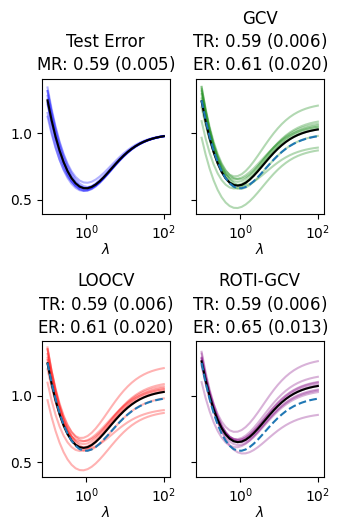

In [4]:
# now write a plotter function
# need 5 subplots: actual MSE curves, gcv MSE curves, LOOCV mse curves, new GCV MSE curves, and finally all 4 in 1 plot for 1 noise iteration

h.plot_results(results_gaussian, lambdas, 1, filename = "gaussian-square.png")
# h.plot_results(results_gaussian, lambdas, 1, )

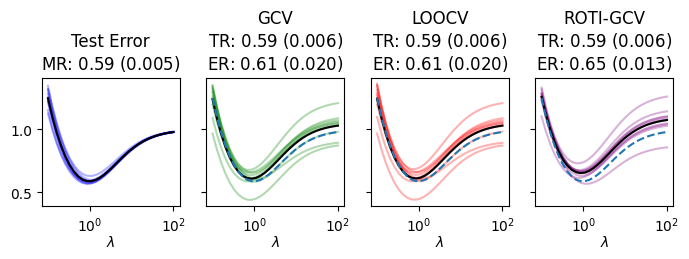

In [5]:
h.plot_results(results_gaussian, lambdas, 1, filename = "gaussian.png", square=False)

### autocorrelated example

In [6]:
n = 1000
p = 1000
r = 1
s = 1
np.random.seed(0)
X_train = h.rho_auto_sample(n, p, rho = 0.8)
beta = h.beta_sampler(p, r = r * np.sqrt(n))
X_test = h.rho_auto_sample(n, p, rho = 0.8)
y_test = X_test @ beta
lambdas = np.logspace(-1, 2, 30)

results_auto = h.gcv_test_pipeline(
    X_train = X_train,
    y_train = None,
    X_test = X_test,
    y_test = y_test,
    lambdas = lambdas,
    r = r,
    sigma = s,
    k = 0,
    true_beta = beta,
    n_iters = 10
)

Computing SVDs
Done computing SVDs
update
0.9999999999999999
0.9989176289125122
1.1937174689575953 1.0498637046532648
update
0.9999999999999999
0.9989176289125122
1.2272562880556317 0.8555563325373806
update
0.9999999999999999
0.9989176289125122
1.006946722546767 0.9794950447149698
update
0.9999999999999999
0.9989176289125122
1.2005750833828919 0.945714755316893
update
0.9999999999999999
0.9989176289125122
1.1432412992507026 0.9207040826446375
update
0.9999999999999999
0.9989176289125122
1.2185498615026846 0.9594331766557341
update
0.9999999999999999
0.9989176289125122
1.1026831332081684 0.9220070944469534
update
0.9999999999999999
0.9989176289125122
1.2106360535576373 0.9848988326286611
update
0.9999999999999999
0.9989176289125122
1.2457199692374785 0.977471673299713
update
0.9999999999999999
0.9989176289125122
1.256949804952994 0.9031509031548385


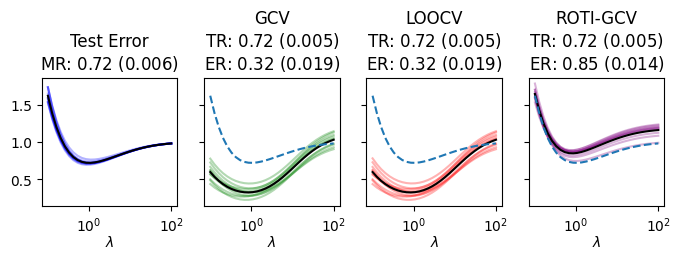

In [7]:
h.plot_results(results_auto, lambdas, 1, "auto.png", square = False)

## t distributed

In [8]:
n = 1000
p = 1000
r = 1
s = 1
np.random.seed(0)
X_train = h.t_sample(n, p)
beta = h.beta_sampler(p, r = r * np.sqrt(n))
X_test = h.t_sample(n, p)
y_test = X_test @ beta
lambdas = np.logspace(-1, 2, 30)

results_t = h.gcv_test_pipeline(
    X_train = X_train,
    y_train = None,
    X_test = X_test,
    y_test = y_test,
    lambdas = lambdas,
    r = r,
    sigma = s,
    k = 0,
    true_beta = beta,
    n_iters = 10
)

Computing SVDs
Done computing SVDs
update
1.0
0.9397262821050982
1.0718343383568845 1.0353028728651918
update
1.0
0.9397262821050982
1.2815489752698845 0.8852833496217152
update
1.0
0.9397262821050982
1.0819066975206748 0.8904095151586701
update
1.0
0.9397262821050982
1.086657371201436 0.931523697385987
update
1.0
0.9397262821050982
0.9755926695159014 0.9591652170403406
update
1.0
0.9397262821050982
1.0678489013818073 0.9869701501045093
update
1.0
0.9397262821050982
0.9789574582111515 0.9236695888592197
update
1.0
0.9397262821050982
1.2380381154249958 0.9431971845112974
update
1.0
0.9397262821050982
1.2068348814645105 1.0109569301173627
update
1.0
0.9397262821050982
1.1077842306457641 0.9228581220488453


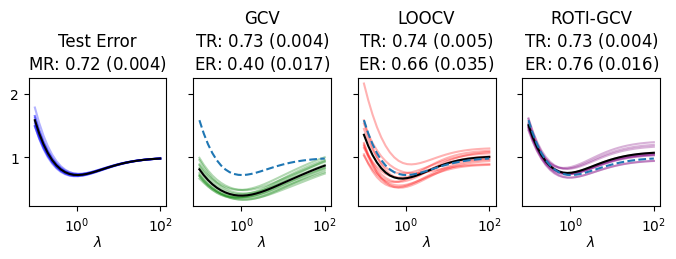

In [9]:
h.plot_results(results_t, lambdas, 1, "t.png", square=False,)

### equicorrelated

In [10]:
n = 1000
p = 1000
r = 1
s = 1
np.random.seed(0)
X_train = h.latent_base_sample(n, p, rho = 0.8)
beta = h.beta_sampler(p, r = r * np.sqrt(n))
X_test = h.latent_base_sample(n, p, rho = 0.8) # h.gaussian_sample(n, p)[0]
y_test = X_test @ beta
lambdas = np.logspace(-1, 2, 30)

results_equicorrelated = h.gcv_test_pipeline(
    X_train = X_train,
    y_train = None,
    X_test = X_test,
    y_test = y_test,
    lambdas = lambdas,
    r = r,
    sigma = s,
    k = 0,
    true_beta = beta,
    n_iters = 10
)

Computing SVDs
Done computing SVDs
update
1.0000000000000002
0.9911937155893795
1.226070084549474 1.1179935512755905
update
1.0000000000000002
0.9911937155893795
0.8815112555314365 1.1103149166840156
update
1.0000000000000002
0.9911937155893795
1.0158588307298768 1.098126423293432
update
1.0000000000000002
0.9911937155893795
0.7523935983849376 1.088720158860808
update
1.0000000000000002
0.9911937155893795
0.9790146260836013 1.0459084300892059
update
1.0000000000000002
0.9911937155893795
0.750119914944201 1.12607816453848
update
1.0000000000000002
0.9911937155893795
0.7818072601741649 1.1222493007315795
update
1.0000000000000002
0.9911937155893795
0.9206208131686255 1.0284065049708935
update
1.0000000000000002
0.9911937155893795
0.8882742033850746 1.0985057811973686
update
1.0000000000000002
0.9911937155893795
0.8879485241671248 1.0007052753090726


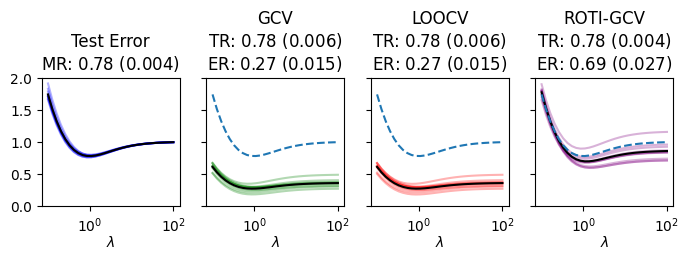

In [11]:
h.plot_results(results_equicorrelated, lambdas, 1, "equi.png", ylim = [0, 2.0], square=False,)


# additional experiments

## sp500 experiments

In [13]:
import pickle

with open("gcv_train_30.pkl", "rb") as f:
    gcv_train = pickle.load(f).to_numpy()

with open("gcv_test_30.pkl", "rb") as f:
    gcv_test = pickle.load(f).to_numpy()

In [14]:
gcv_train.shape

(493, 493)

In [15]:
gcv_test.shape

(1755, 493)

In [16]:
n, p = 493, 493
r, s = 1, 1

X_train = gcv_train # h.gaussian_sample(n, p)[0]
results_array = [None for _ in range(4)]

for i in range(4):
    np.random.seed(i)
    beta = h.beta_sampler(p, r = np.sqrt(n) * r)
    # have to rescale to keep distribution the same
    X_test = gcv_test # np.random.normal(size = (1000, p)) / np.sqrt(n)
    y_test = X_test @ beta
    lambdas = np.logspace(-1, 2, 30)

    results_array[i] = h.gcv_test_pipeline(
        X_train = X_train,
        y_train = None,
        X_test = X_test,
        y_test = y_test,
        lambdas = lambdas,
        r = r,
        sigma = s,
        k = 0,
        true_beta = beta,
        n_iters = 10,
        oracle_test=False
    )

Computing SVDs
Done computing SVDs
update
1.0000000000000002
0.8534591556158553
0.9615111178577405 0.9449646041501626
update
1.0000000000000002
0.8534591556158553
1.1965386105810647 0.8818026922711781
update
1.0000000000000002
0.8534591556158553
0.8734169179118287 0.9558282959844521
update
1.0000000000000002
0.8534591556158553
1.2130701073592496 0.8542873382894985
update
1.0000000000000002
0.8534591556158553
1.059689378459056 0.8663743745790959
update
1.0000000000000002
0.8534591556158553
1.1807972807287734 1.015449209585812
update
1.0000000000000002
0.8534591556158553
1.0426731057907979 1.0086560356167706
update
1.0000000000000002
0.8534591556158553
1.1435680752273871 0.9858467067733567
update
1.0000000000000002
0.8534591556158553
1.1007899456162078 0.9900382216405497
update
1.0000000000000002
0.8534591556158553
1.2313769314986511 1.0148000625167428
Computing SVDs
Done computing SVDs
update
1.0000000000000002
0.8534591556158553
0.5641690792207273 0.9828058336481653
update
1.0000000000

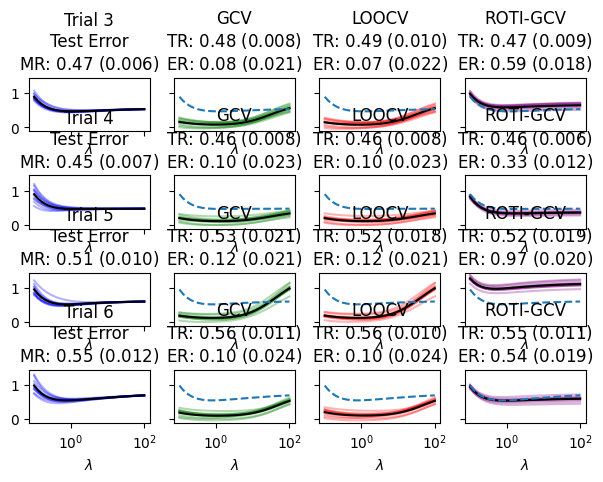

In [17]:
h.plot_results_combo(results_array, lambdas, 1, filename = "sp500_ensemble.png")

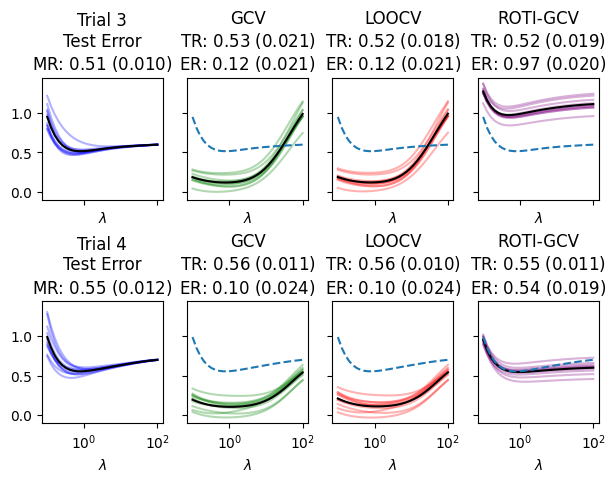

In [18]:
h.plot_results_combo(results_array[2:4], lambdas, 1, filename = "sp500_ensemble_2of2.png")

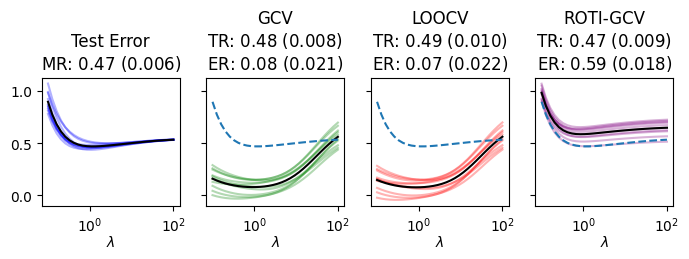

In [19]:
h.plot_results(results_array[0], lambdas, 1, "sp500_single.png", square=False,)

# example with alignment

In [20]:
n, p = 1000, 1000
k = 10

np.random.seed(0)

X, Qt, d, O = h.rho_auto_sample(n, p, rho = 0.8, return_svd=True) # already scaled down
# print(O[0])
D = np.zeros((n, p))
np.fill_diagonal(D, d)
# D[0, 0] = 40

# X = Qt @ D @ O

X_tmp, Qt, d, O_unused = h.rho_auto_sample(n, p, rho = 0.8, return_svd = True) # this way don't need to rescale
O_new = h.conditional_haar_draw(O, k = k)
D_new = np.zeros((n, p))
np.fill_diagonal(D_new, d)
# D_new[0, 0] = 40

X_test = Qt @ D_new @ O_new # X_tmp @ O_unused.T @ O_new # cancels out old and gets new one in

beta_unaligned = h.beta_sampler(p, r = 1 * np.sqrt(n))
alphas = (np.sqrt(n) * (np.arange(k) + 1) / k)[::-1]
beta_aligned = np.zeros(p)
for i in range(k):
    beta_aligned += alphas[i] * O[i]

beta = beta_unaligned + beta_aligned

In [21]:
np.allclose(O_new[:k], O[:k])

True

In [22]:
alphas

array([31.6227766 , 28.46049894, 25.29822128, 22.13594362, 18.97366596,
       15.8113883 , 12.64911064,  9.48683298,  6.32455532,  3.16227766])

In [23]:
lambdas = np.logspace(-1, 1, 30)
result_explicit_align = h.gcv_test_pipeline(
    X_train = X,
    y_train = None,
    X_test = X_test,
    true_beta=beta,
    y_test = X_test @ beta,
    lambdas = lambdas,
    r = np.linalg.norm(beta) / np.sqrt(n),
    sigma = 1,
    k = 10,
    n_iters = 10
)

Computing SVDs
Done computing SVDs
update
1.0
0.9402366632132754
1.3287409784861592 0.8213154567636015
update
1.0
0.9402366632132754
1.032471716131714 1.0829689708467611
update
1.0
0.9402366632132754
1.23715726115711 0.8793694233580543
update
1.0
0.9402366632132754
1.15229043988272 1.0284650783617053
update
1.0
0.9402366632132754
1.1855307555069248 0.9039789751997145
update
1.0
0.9402366632132754
1.031596175772828 0.9764150911070608
update
1.0
0.9402366632132754
0.9635035441668821 1.087500926378991
update
1.0
0.9402366632132754
1.2001987627712027 1.0503464339988287
update
1.0
0.9402366632132754
1.1479342670954207 1.0825115684755457
update
1.0
0.9402366632132754
1.124927230460604 0.955270383639549


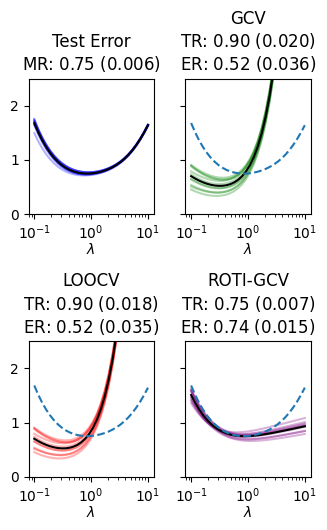

In [24]:
h.plot_results(result_explicit_align, lambdas, 1, "aligned-square.png", ylim = [0, 2.5])

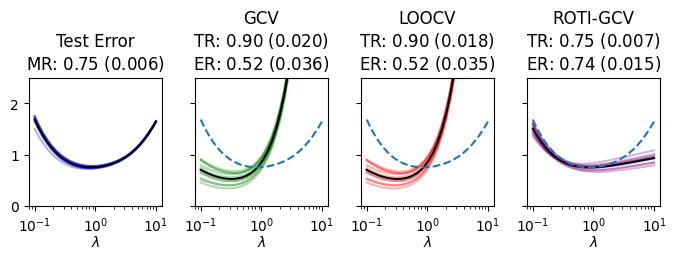

In [25]:
h.plot_results(result_explicit_align, lambdas, 1, "aligned.png", ylim = [0, 2.5], square=False)

# gaussian mixture

In [26]:
n, p = 1000, 1000
r, s = 1, 1

np.random.seed(0)

X_train = h.gaussian_mixture_sample(n, p, mu = 3)[0]
beta = h.beta_sampler(p, r = np.sqrt(n) * r)
# have to rescale to keep distribution the same
X_test = h.gaussian_mixture_sample(n, p, mu = 3)[0]
y_test = X_test @ beta
lambdas = np.logspace(-1, 1, 30)

results = h.gcv_test_pipeline(
    X_train = X_train,
    y_train = None,
    X_test = X_test,
    y_test = y_test,
    lambdas = lambdas,
    r = r,
    sigma = s,
    k = 10,
    true_beta = beta,
    n_iters = 10,
    oracle_test=False
)

Computing SVDs
Done computing SVDs
update
0.9999999999999999
0.3104313146399111
0.7650206468092516 0.9334963957844113
update
0.9999999999999999
0.3104313146399111
0.5600272775416956 1.16296309800275
update
0.9999999999999999
0.3104313146399111
1.879882951047023 0.9213732472797255
update
0.9999999999999999
0.3104313146399111
0.8454060130987748 1.0474206665683372
update
0.9999999999999999
0.3104313146399111
1.432696227631828 0.9588765142178004
update
0.9999999999999999
0.3104313146399111
1.0615493788123478 0.9746280528350153
update
0.9999999999999999
0.3104313146399111
1.4883373717921535 0.9552138642625418
update
0.9999999999999999
0.3104313146399111
1.0979824153741917 1.0012342676290702
update
0.9999999999999999
0.3104313146399111
1.557151047874402 0.9557895862901636
update
0.9999999999999999
0.3104313146399111
0.9794113526743355 0.9795663385893886


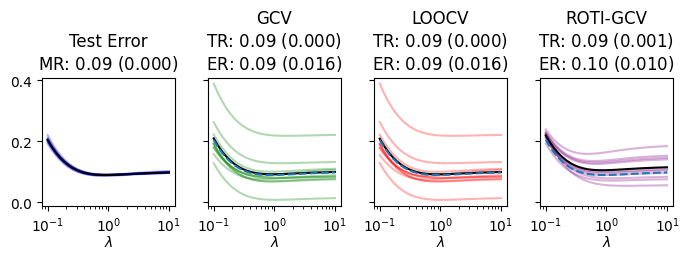

In [27]:
h.plot_results(results, lambdas, 1, "mixture.png", square=False)
# h.plot_results(results, lambdas, 1, None)

In [28]:
n, p = 1000, 1000
r, s = 1, 1

np.random.seed(0)

X_train = h.gaussian_row_corr_sample(n, p, rho = 0.6)[0]
beta = h.beta_sampler(p, r = np.sqrt(n) * r)
# have to rescale to keep distribution the same
X_test = h.gaussian_row_corr_sample(n, p, rho = 0.6)[0]
y_test = X_test @ beta
lambdas = np.logspace(-1, 1, 30)

results_row_equi = h.gcv_test_pipeline(
    X_train = X_train,
    y_train = None,
    X_test = X_test,
    y_test = y_test,
    lambdas = lambdas,
    r = r,
    sigma = s,
    k = 10,
    true_beta = beta,
    n_iters = 10,
    oracle_test=False
)

Computing SVDs
Done computing SVDs
update
0.9999999999999999
0.49082569740873744
1.6258605117970475 0.9883896002374798
update
0.9999999999999999
0.49082569740873744
1.3059383411865857 0.8246940543399603
update
0.9999999999999999
0.49082569740873744
0.7806895666171877 1.0304148714405637
update
0.9999999999999999
0.49082569740873744
1.1148889835969262 0.9757419303629479
update
0.9999999999999999
0.49082569740873744
1.15154034812818 0.9695628272686555
update
0.9999999999999999
0.49082569740873744
1.2879305359582212 0.9657763151699756
update
0.9999999999999999
0.49082569740873744
0.9652647803315478 0.9536599440347342
update
0.9999999999999999
0.49082569740873744
1.1562420153121953 1.013433130222394
update
0.9999999999999999
0.49082569740873744
1.0640926074666799 1.0128062311358472
update
0.9999999999999999
0.49082569740873744
1.4031356099528625 0.9211939142329063


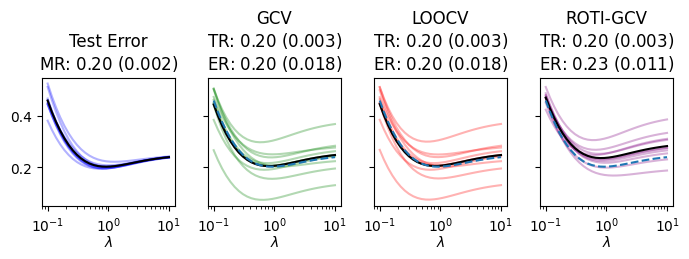

In [29]:
h.plot_results(results_row_equi, lambdas, 1, "row_equicorrelation.png", square=False)